# Gender Recognition by Voice

## Importing Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [2]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,-4.049248,-4.224901,-2.576102,-5.693607,-0.214778,0.427355,2.925892,3.177486,-0.039083,0.471575,-2.141210,-1.812038,-1.384486,0.636793,-1.454772,-1.564205,-0.708404,-1.431422,-1.419137,male
1,-3.841053,-3.999293,-2.486885,-5.588987,-0.258485,0.611669,4.032721,4.022523,-0.065236,0.594431,-2.141210,-1.079594,-1.369352,-0.524133,-1.014103,-1.561916,-0.708404,-1.418107,-1.405818,male
2,-3.463066,-4.095851,-2.706986,-3.928699,0.909326,1.603848,4.675089,4.506253,-1.083730,0.398261,-2.141210,-1.365368,-1.390131,0.404082,-1.065344,-1.563866,-0.708404,-1.429203,-1.416917,male
3,-0.992157,-0.759454,-0.901418,-0.711205,0.632690,0.899998,-0.927599,-0.837709,1.516383,1.797340,-1.054576,-1.666966,-1.143909,-0.524133,0.614286,-1.195367,-0.708404,-1.273867,-1.261532,male
4,-1.530640,-1.676948,-1.268395,-0.792029,1.005588,1.322561,-1.055855,-0.807635,1.708336,2.114740,-0.790514,-1.127233,-1.239725,0.189238,0.289046,-0.221660,-0.708404,0.124154,0.136933,male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Baseline Model: Classification Tree

In the lecture, we have seen that a classification tree is a good model to start with. We will use the same model here.

We try to use a classification tree with depth 4.

### Training the Model

We will use the `DecisionTreeClassifier` from `sklearn.tree` to train a classification tree. We will use the default parameters for now.


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluating the Model

Firstly, we will use the `score` method to see the accuracy of the model on the training set.

In [5]:
print("Training set accuracy: {:.2f}".format(tree.score(X_train, y_train)))

Training set accuracy: 1.00


Then we will use the `score` method to see the accuracy of the model on the test set.

In [6]:
print("Test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

Test set accuracy: 0.96


We try to see the confusion matrix of the model.

<Axes: >

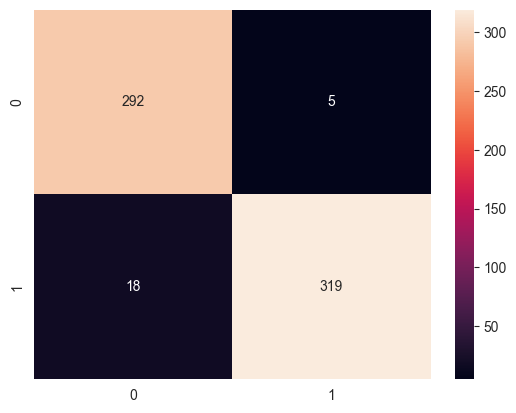

In [7]:
from sklearn.metrics import confusion_matrix

y_prediction = tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [8]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.2f}".format(TPR))
print("True Negative Rate: {:.2f}".format(TNR))
print("False Positive Rate: {:.2f}".format(FPR))
print("False Negative Rate: {:.2f}".format(FNR))

True Positive Rate: 0.95
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.05


### Visualizing and Analyzing the Model

Then we try to draw the tree using `sklearn.tree.plot_tree`.

[Text(0.4053308823529412, 0.9583333333333334, 'meanfun <= -0.103\ngini = 0.5\nsamples = 2534\nvalue = [1287, 1247]\nclass = l'),
 Text(0.1645220588235294, 0.875, 'IQR <= -0.305\ngini = 0.082\nsamples = 1242\nvalue = [53, 1189]\nclass = a'),
 Text(0.07352941176470588, 0.7916666666666666, 'meanfun <= -0.403\ngini = 0.478\nsamples = 53\nvalue = [32, 21]\nclass = l'),
 Text(0.04411764705882353, 0.7083333333333334, 'sfm <= 0.389\ngini = 0.464\nsamples = 30\nvalue = [11, 19]\nclass = a'),
 Text(0.029411764705882353, 0.625, 'dfrange <= -1.274\ngini = 0.172\nsamples = 21\nvalue = [2, 19]\nclass = a'),
 Text(0.014705882352941176, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = l'),
 Text(0.04411764705882353, 0.5416666666666666, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]\nclass = a'),
 Text(0.058823529411764705, 0.625, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = l'),
 Text(0.10294117647058823, 0.7083333333333334, 'sd <= -0.807\ngini = 0.159\nsamples = 23\nvalue = [21,

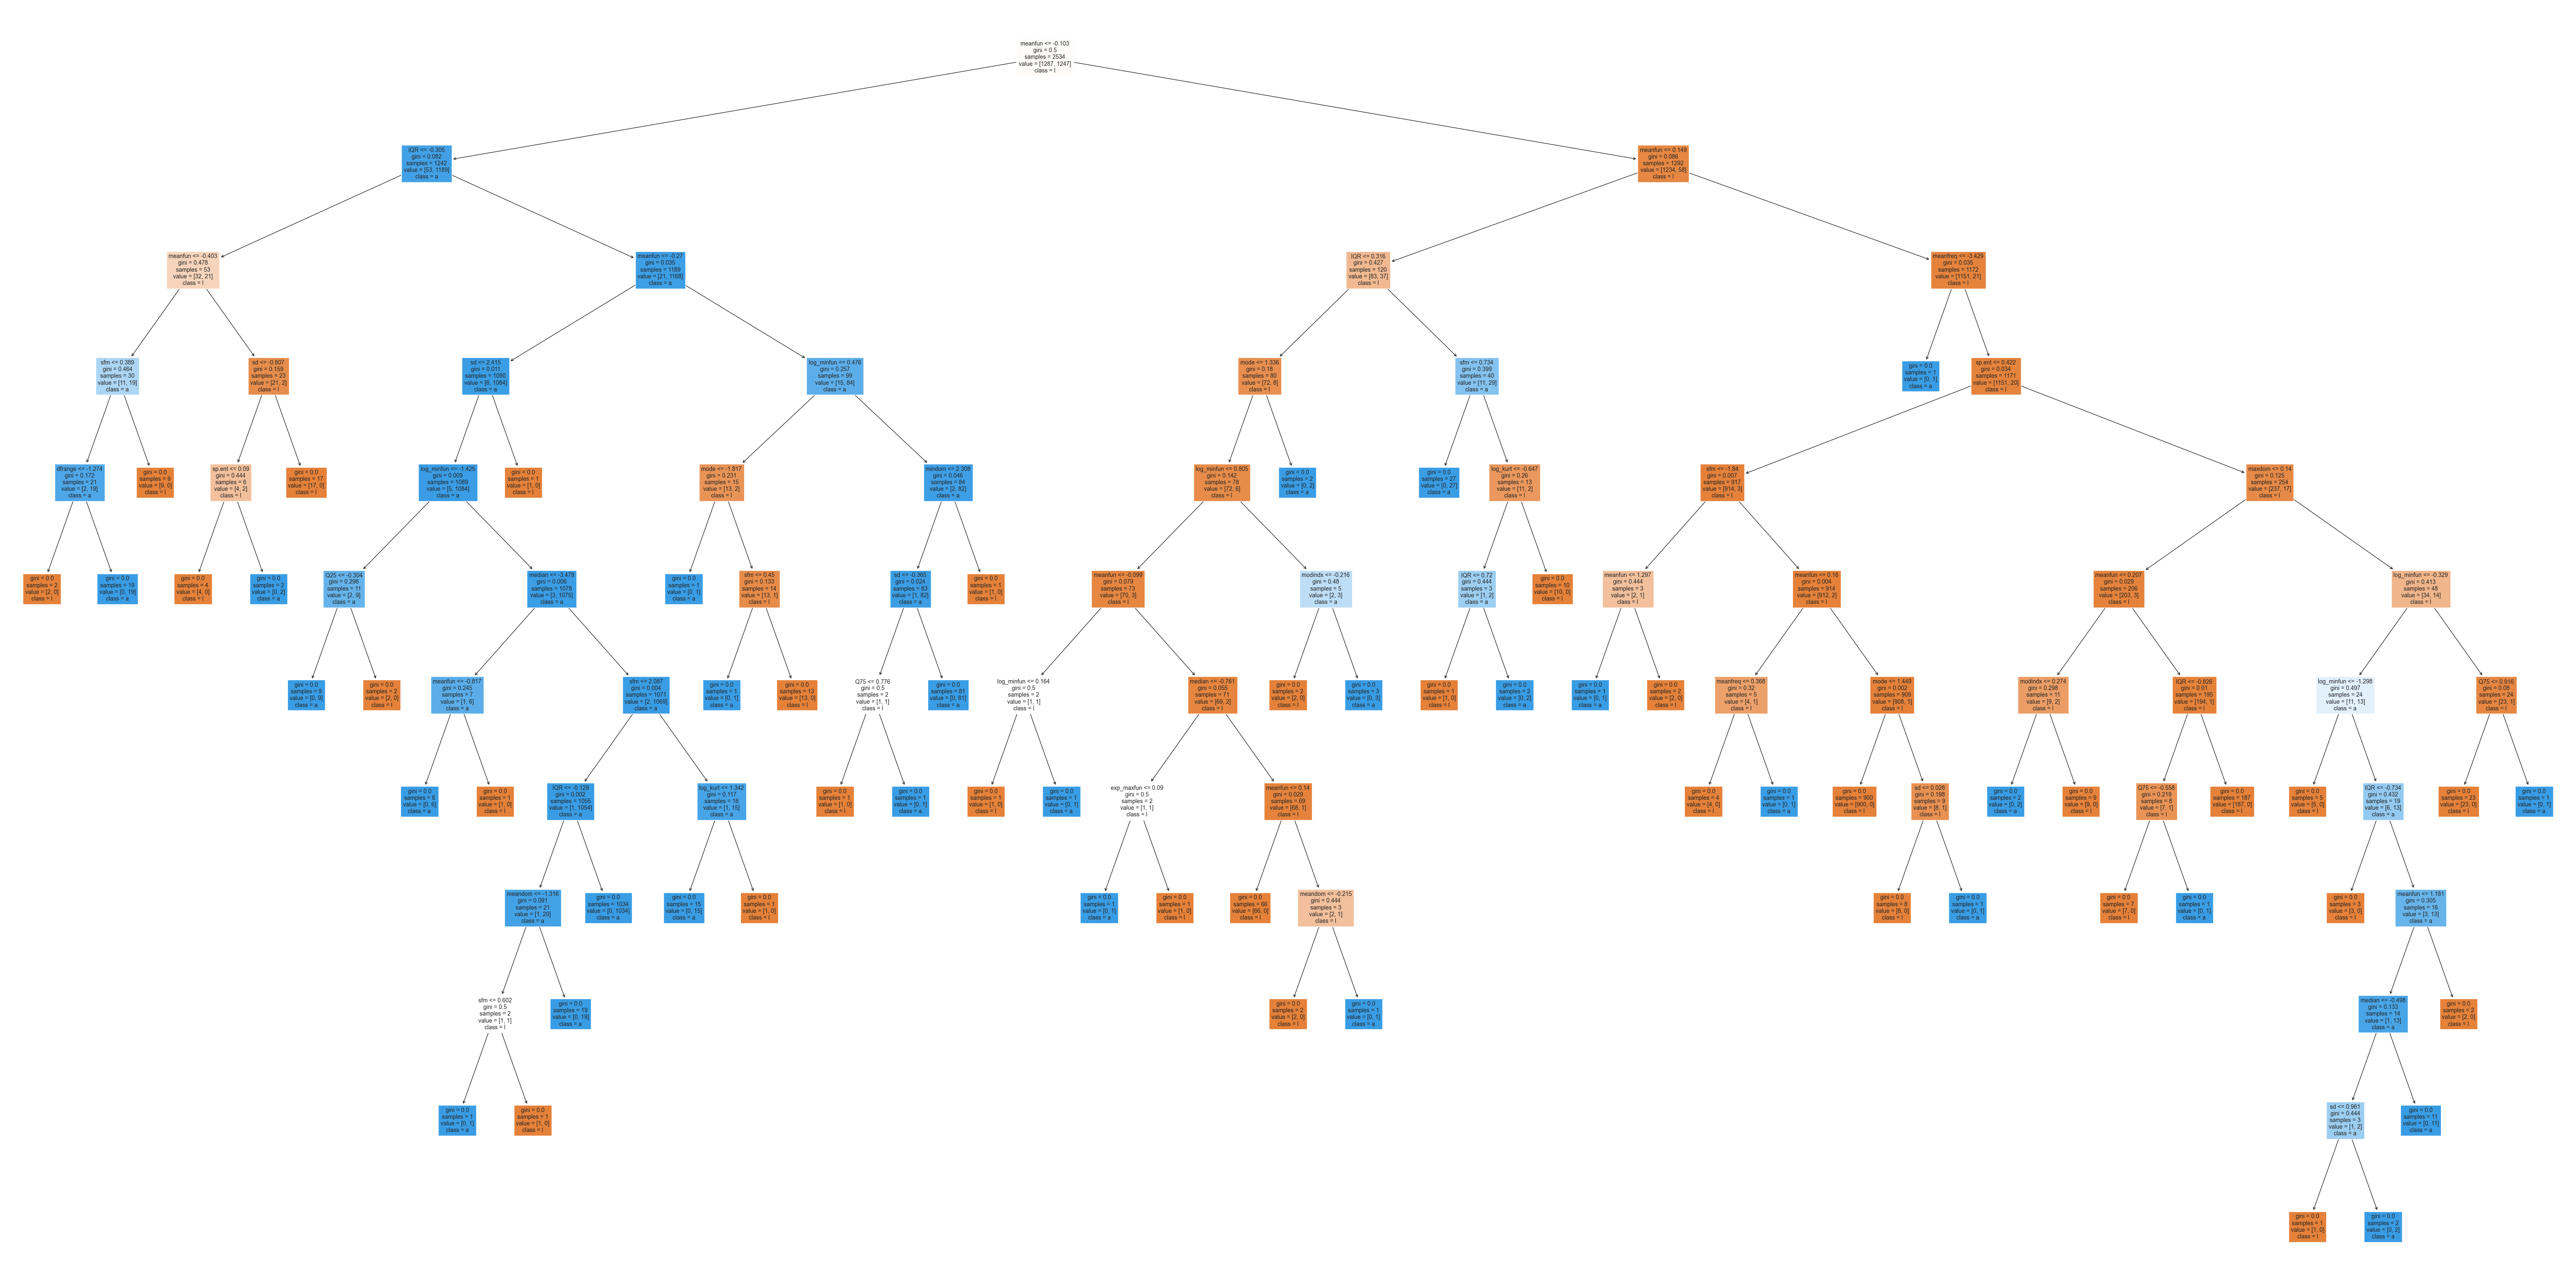

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 40))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=10)

From the tree, we can see that the most important feature is `meanfun`. The second most important feature is `IQR`.

<Axes: xlabel='meanfun', ylabel='IQR'>

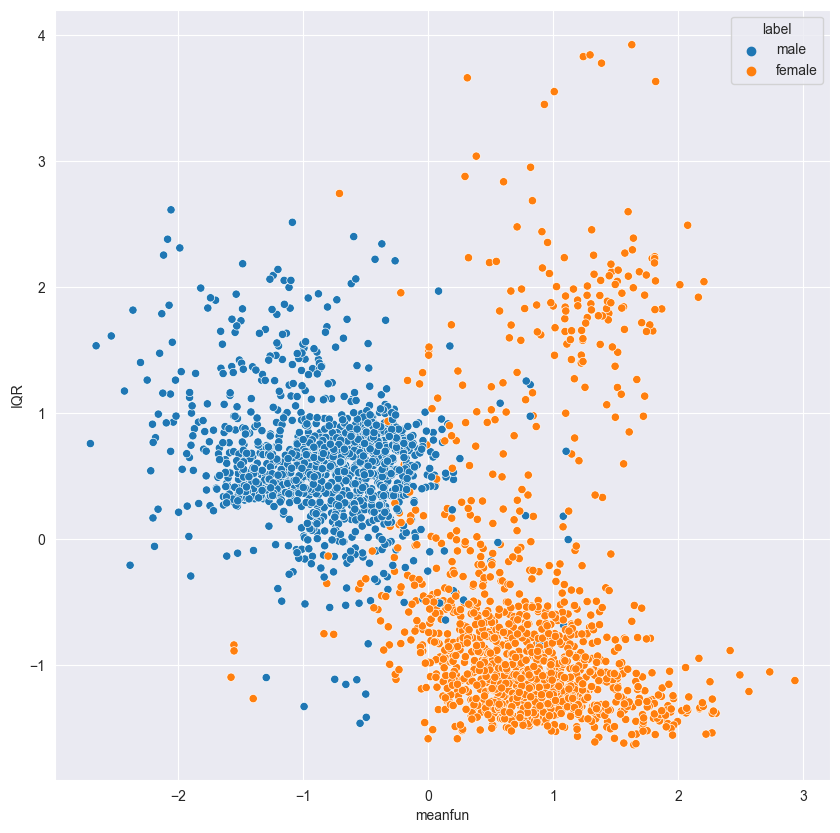

In [10]:
X_train_important = X_train[["meanfun", "IQR"]]
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_train_important, x="meanfun", y="IQR", hue=y_train["label"])

## Logistic Regression

$$
\hat{p} = \frac{1}{1 + e^{-\sum_{i=1}^n \beta_i x_i}}
$$

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=87, max_iter=1000).fit(X_train, y_train.squeeze())
print("beta_0: {:.2f}".format(logreg.intercept_[0]))
for i, beta in enumerate(logreg.coef_[0]):
    print("beta_{}: {:.2f}".format(i + 1, beta))

beta_0: -0.93
beta_1: -0.22
beta_2: -0.12
beta_3: -0.68
beta_4: 0.58
beta_5: 1.10
beta_6: 0.38
beta_7: 0.51
beta_8: -0.90
beta_9: 1.40
beta_10: -1.51
beta_11: 0.14
beta_12: -4.82
beta_13: 0.73
beta_14: 0.05
beta_15: -0.23
beta_16: -0.07
beta_17: 0.02
beta_18: -0.04
beta_19: -0.04


In [12]:
logreg.score(X_train, y_train)

0.9739542225730071

In [13]:
logreg.score(X_test, y_test)

0.9779179810725552

In [14]:
y_prediction = logreg.predict(X_test)

<Axes: >

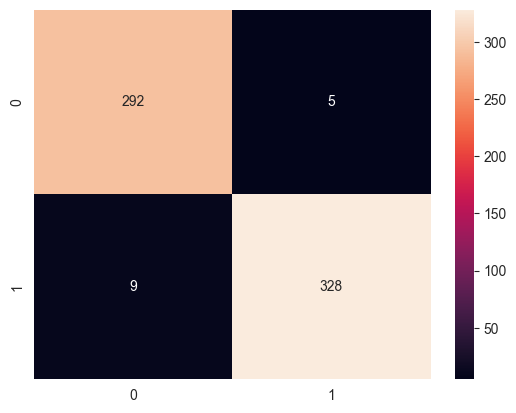

In [15]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=87).fit(X_train, y_train.squeeze())

In [17]:
rf.score(X_train, y_train)

1.0

In [18]:
rf.score(X_test, y_test)

0.9842271293375394

# Support Vector Machines

In [19]:
from sklearn.svm import SVC

svm = SVC(random_state=87, kernel="poly").fit(X_train_important, y_train.squeeze())

In [20]:
svm.score(X_train_important, y_train)

0.9411996842936069

In [21]:
svm.score(X_test[["meanfun", "IQR"]], y_test)

0.9605678233438486

In [22]:
y_prediction = svm.predict(X_test[["meanfun", "IQR"]])

<Axes: >

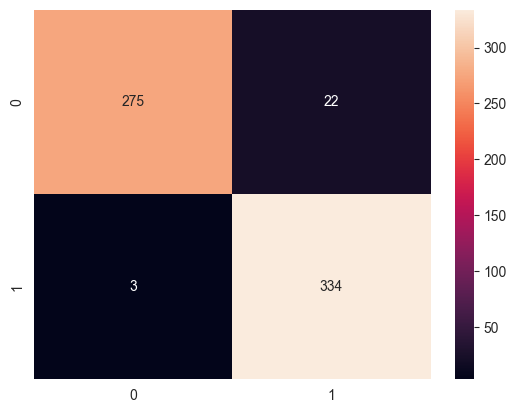

In [23]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

<Axes: xlabel='meanfun', ylabel='IQR'>

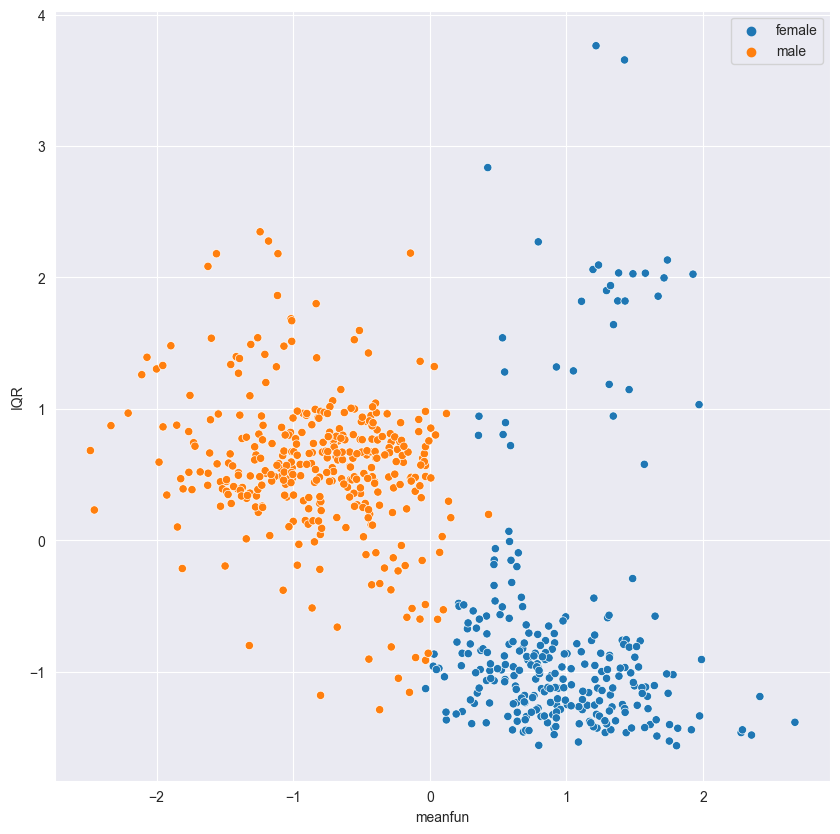

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_test, x="meanfun", y="IQR", hue=y_prediction)

Use all features

In [47]:
svm2 = SVC(kernel="poly", random_state=87).fit(X_train, y_train.squeeze())

In [48]:
svm2.score(X_train, y_train)

0.9775059194948698

In [49]:
svm2.score(X_test, y_test)

0.9763406940063092

In [34]:
y_prediction = svm2.predict(X_test)

<Axes: >

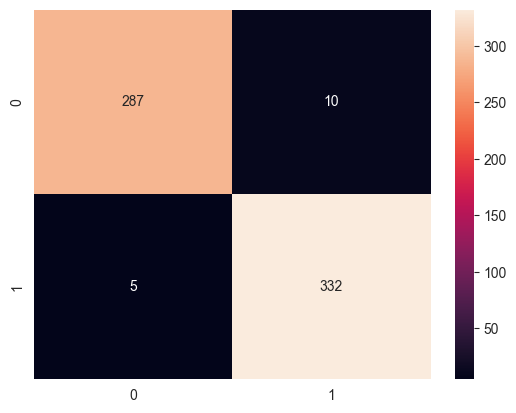

In [29]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

<Axes: xlabel='meanfun', ylabel='IQR'>

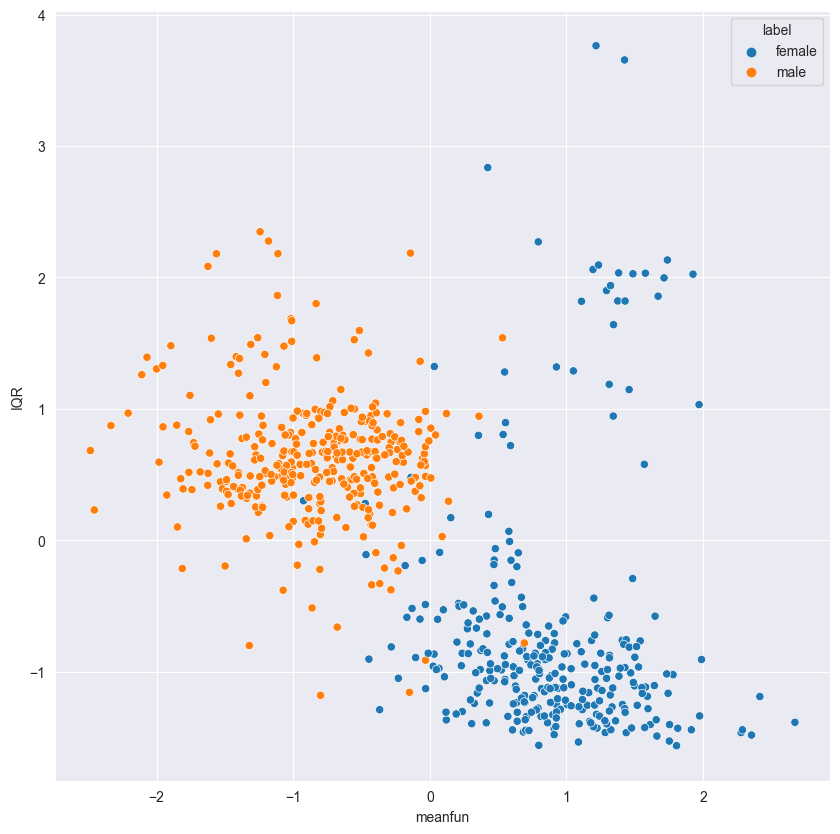

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=X_test, x="meanfun", y="IQR", hue=y_test["label"])

In [51]:
svm3 = SVC(random_state=87).fit(X_train, y_train.squeeze())

In [52]:
svm3.score(X_train, y_train)

0.9861878453038674

In [53]:
svm3.score(X_test, y_test)

0.9826498422712934

In [54]:
svm4 = SVC(random_state=87, kernel="sigmoid").fit(X_train, y_train.squeeze())

In [55]:
svm4.score(X_train, y_train)

0.803078137332281

In [56]:
svm4.score(X_test, y_test)

0.8201892744479495

In [60]:
svm5 = SVC(random_state=87, kernel="linear").fit(X_train, y_train.squeeze())

In [61]:
svm5.score(X_train, y_train)

0.9779005524861878

In [62]:
svm5.score(X_test, y_test)

0.9763406940063092